<a href="https://colab.research.google.com/github/Sshubam/FSM_ML_Assignments/blob/main/FSM_1_NaiveBayesClassifier_KNNClassifier_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# Loading our Data


---



In [77]:
import numpy as np
import pandas as pd
!pip install ipyvizzu
from ipyvizzu import *
import matplotlib as mpl
from scipy.stats import mode
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
train_df = pd.read_csv("train.csv")

In [79]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C




---


**Variable :	Definition	Key**


---


survived : Survived	0 = No, 1 = Yes

pclass : Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex : Sex

Age :	Age in years	

sibsp	: # of siblings / spouses aboard the Titanic

parch	: # of parents / children aboard the Titanic	

ticket : Ticket number	

fare : Passenger fare	

cabin :	Cabin number	

embarked :	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


---



In [80]:
maxValues = train_df.max()
print(maxValues)

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.




---


# EDA WITH MATPLOTLIB 


---




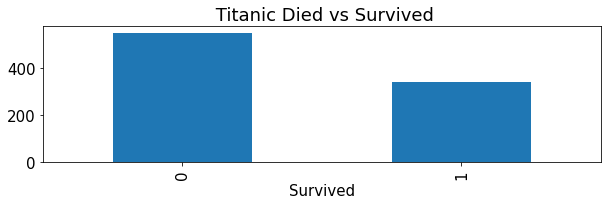

In [81]:
from matplotlib.pyplot import figure
figure(figsize=(10, 2.5))
plt.rcParams.update({'font.size': 15})
train_df.groupby(['Survived']).size().plot(kind = "bar")
plt.title(" Titanic Died vs Survived")
plt.show()

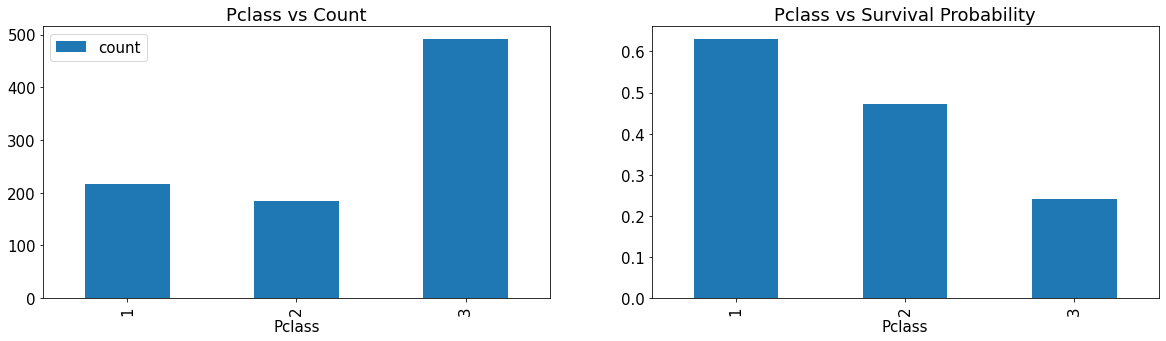

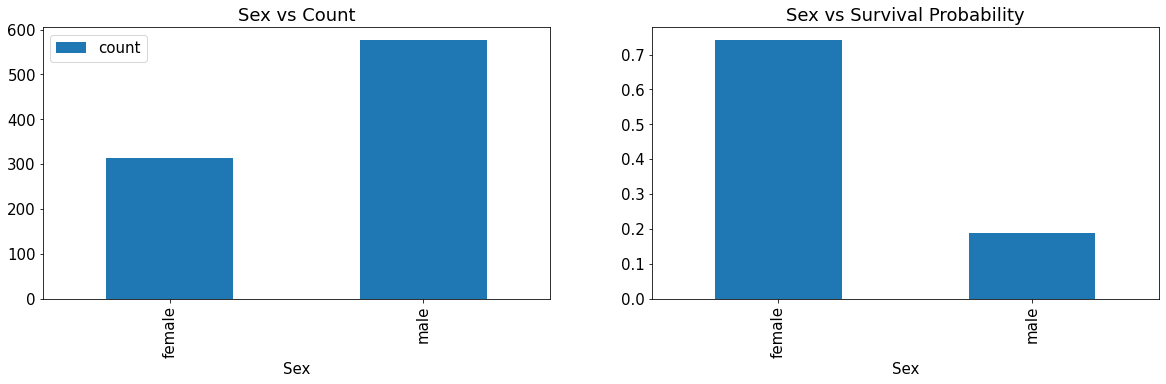

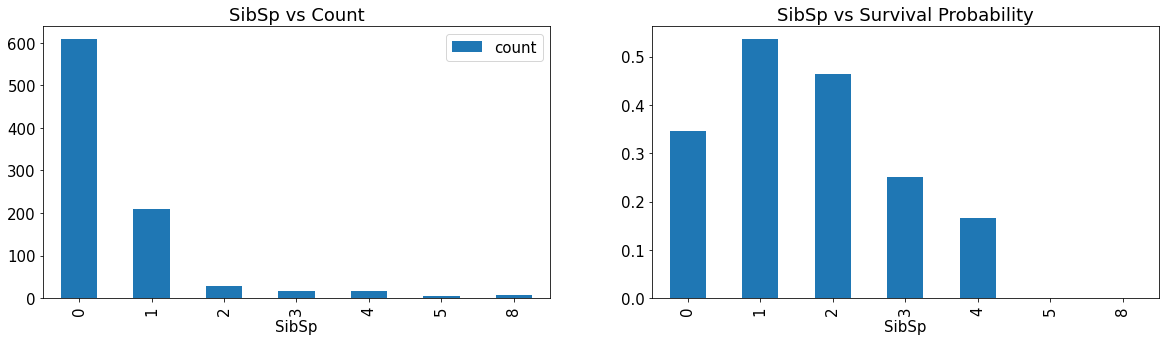

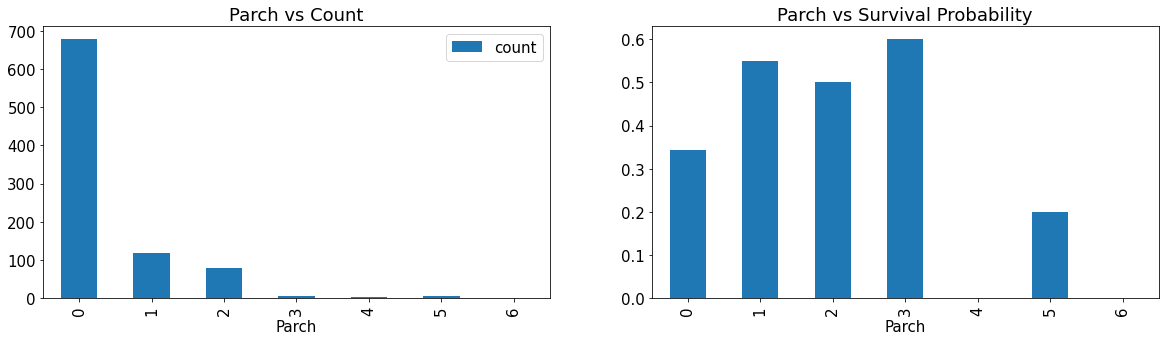

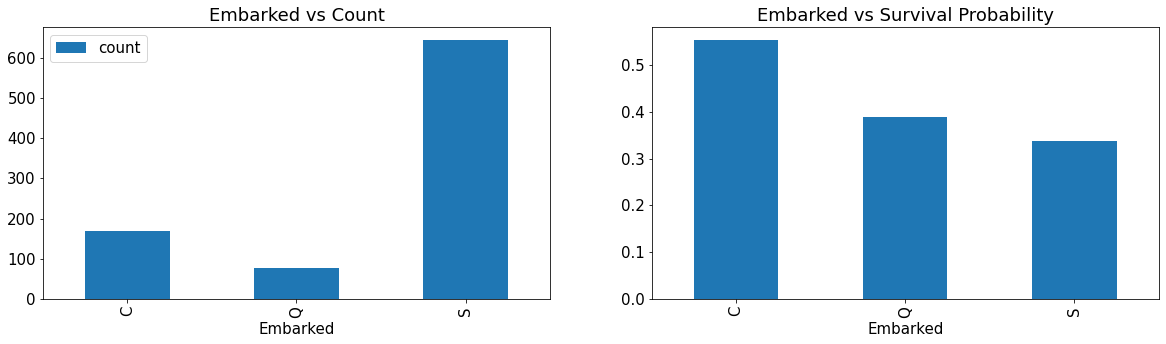

In [82]:
for category in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']: 
  fig, axes = plt.subplots(nrows=1, ncols=2)
  #Plotting the category vs category count on first axes (column)
  (train_df.groupby(category)['Survived'].agg(['count'])).plot.bar(ax=axes[0], figsize=(20, 5), title=f"{category} vs Count") 
  #Plotting the category vs Survival Probability on first axes (column) 
  (train_df.groupby(category)['Survived'].mean()).plot.bar(ax=axes[1], title=f"{category} vs Survival Probability")

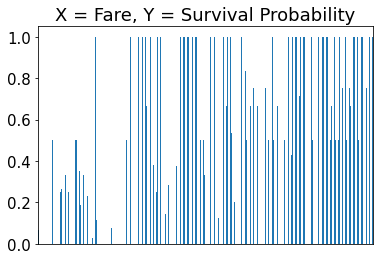

In [83]:
ax = (train_df.groupby('Fare')['Survived'].mean()).plot.bar(title=f"X = Fare, Y = Survival Probability")
ax.axes.get_xaxis().set_visible(False)

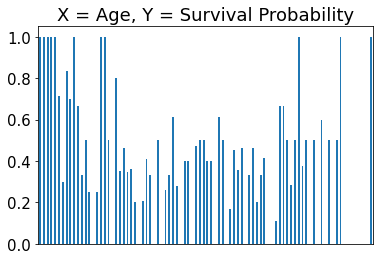

In [84]:
ax = (train_df.groupby('Age')['Survived'].mean()).plot.bar(title=f"X = Age, Y = Survival Probability")
ax.axes.get_xaxis().set_visible(False)

**From the above Exploratory Data Analysis, we can clearly observe :**



*   Passengers having Ticket Class 1 have a higher Survival Probability than Ticket Class 2 and Class 3, higher the ticket class, higher the survival probability, so we can use this feature.
*   Female Passengers have a much higher survival probability than male passenegrs
*   Passengers having higher no. of siblings / spouses aboard the Titanic have less probability of surviving
*   Passengers having different no. of parents / children aboard the Titanic have slightly higher/lower Survival probability.
*   Passengers having port of Embarkation C have a higher probability of surviving than People having embarkation Q and S, Q having more survival probabiility than S and s having the least.









---


# Exploratory Data Analysis (with IPYVIZZU)


---



In [85]:
df1 = pd.read_csv('train.csv')
df1['Count'] = 1
df1['Survived'] = df1['Survived'].map({1: 'Survived', 0: 'Died'})
df1['Pclass'] = df1['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})
df1['Parch'] = df1['Parch'].map({0: 'Zero', 1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 5: 'Five', 6: 'Six'})
df1['SibSp'] = df1['SibSp'].map({0: 'Zero', 1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 5: 'Five', 6: 'Six', 7: 'Seven', 8: 'Eight'})

In [113]:
def animate_plot(df, var1, var2, title):
  # rerun function call to see animation
  data = Data()
  data.add_data_frame(df)
  chart = Chart(width="1000px", height="500px", display="manual")

  chart.animate(data)
  chart.animate(Config({"x": "Count", "y": var1, "label": "Count","title":f"{title}"}))
  chart.animate(Config({"x": ["Count",var2], "label": ["Count",var2], "color": var2}))
  chart.animate(Config({"x": "Count", "y": [var1, var2]}))

  chart.show()

In [114]:
animate_plot(df1, "Sex", "Survived", "Gender vs Survived")

In [109]:
animate_plot(df1, "Embarked", "Survived", "Point of Embarkation vs Survived")

In [110]:
animate_plot(df1, "Pclass", "Survived", "Ticket Class vs Survived")

In [111]:
animate_plot(df1, "Parch", "Survived", "# of parents / children aboard the Titanic vs Survived")

In [112]:
animate_plot(df1, "SibSp", "Survived", "# of siblings / spouses aboard the Titanic vs Survived")



---


# DATA PREPROCESSING


---



In [92]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
train_df = pd.read_csv("train.csv")
# Mapping the Sex column for male = 0 and female = 0
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female' : 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 1, 'C' : 2, 'Q' : 3})
# We dont need Name, PassenegerId, Ticket and Cabin because they are not features, we drop the Age cloumn as it contains missing values and is not a useful feature.
train_df = train_df.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin', 'Age'])
# Dropped any null Value (2 in embarked column)
train_df = train_df.dropna(how='any', axis=0) 
# Binning the Age Column into 5 equally spaces categories labelled as 1, 2, 3, 4, 5
train_df["Fare"] = pd.cut(train_df["Fare"].values, bins = 5, labels = [1,2,3,4,5])
# Tried binning the Age into categories but showed a obvious accuracy decrease because People in Titanic died regardlessly of age (majorly).
# train_df["Age"] = pd.cut(train_df["Age"].values, bins = 10, labels = [1,2,3,4,5,6,7,8,9,10])
train_df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,1,1.0
1,1,1,1,1,0,1,2.0
2,1,3,1,0,0,1,1.0
3,1,1,1,1,0,1,1.0
4,0,3,0,0,0,1,1.0
...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,1.0
887,1,1,1,0,0,1,1.0
888,0,3,1,1,2,1,1.0
889,1,1,0,0,0,1,2.0


In [94]:
train_df.describe()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.350956,0.524184,0.382452,1.362205
std,0.486260,0.834700,0.477538,1.103705,0.806761,0.636157
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,3.000000


In [95]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    int64   
 3   SibSp     889 non-null    int64   
 4   Parch     889 non-null    int64   
 5   Fare      889 non-null    category
 6   Embarked  889 non-null    float64 
dtypes: category(1), float64(1), int64(5)
memory usage: 49.7 KB


===================================================================================================================

Applying the previously used PreProcessing to the Test Data as well

In [96]:
test_df = pd.read_csv("test.csv")
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female' : 1})
test_df['Embarked'] = test_df['Embarked'].map({'S': 1, 'C' : 2, 'Q' : 3})
test_df = test_df.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin', 'Age'])
# test_df['Age'] = (test_df['Age'] - test_df['Age'].mean() ) / test_df['Age'].std()
# test_df['Fare'] = ( test_df['Fare'] - test_df['Fare'].mean() ) / test_df['Fare'].std()
test_df["Fare"] = pd.cut(test_df["Fare"].values, bins = 5, labels = [1,2,3,4,5])
# test_df["Age"] = pd.cut(test_df["Age"].values, bins = 10, labels = [1,2,3,4,5,6,7,8,9,10])
test_df

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,0,0,1,3
1,3,1,1,0,1,1
2,2,0,0,0,1,3
3,3,0,0,0,1,1
4,3,1,1,1,1,1
...,...,...,...,...,...,...
413,3,0,0,0,1,1
414,1,1,0,0,2,2
415,3,0,0,0,1,1
416,3,0,0,0,1,1


In [97]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    int64   
 1   Sex       418 non-null    int64   
 2   SibSp     418 non-null    int64   
 3   Parch     418 non-null    int64   
 4   Fare      417 non-null    category
 5   Embarked  418 non-null    int64   
dtypes: category(1), int64(5)
memory usage: 17.1 KB




---


# NAIVE BAYES CLASSSIFIER


---



**For implementing the Naive Bayes Classifier :**



> c|x below represents the probability of c given x, where c is class variable (died or survived) and x is the features (Fare, Sex, Embarked, etc.) 


> Here x1, x2 below in the picture represents various features which are together used to compute the posterior probability of a class (c) given features (x)


> Here we consider the features independent, for example a person being female has no connection in calculating her survival probability whether she paid a higher fare or not, also all the features are equally important in calculating the surivivial probability



> We first compute the condition probabilities of every class with respect to its features (assume conditional pr. for a person surviving titanic having a fare category 8 is 0.8 and conditional probobaility for a person having 1 child is 0.3, so the conditional probability for the person surviving with 1 child and fare cat. 8 will be the product of the individual feature conditional probabilities

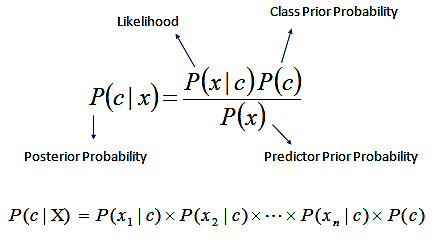

In [98]:
# Function to calculate X|Y
def calculate_x_given_y(df, feature_name, feature_value, Y, label):
  feat = list(df.columns)
  df = df[df[Y]==label]
  p_x_given_y = len(df[df[feature_name]==feature_value]) / len(df)
  return p_x_given_y

In [99]:
# Fucntion calculate prior probability (ignore denominator)
def prior_probability(df, Y):
  classes = sorted(list(df[Y].unique()))
  prior = []
  for i in classes:
    prior.append(len(df[df[Y]==i])/len(df))
  return prior

In [100]:
# putting everything together
def naive_bayes_categorical(df, X, Y):
  # getting the feature names
  features = list(df.columns)[:-1]

  # calculating prior probability
  prior = prior_probability(df, Y)

  Y_pred = []
  # looping over every data point
  for x in X:
    # calculate likelihood for every data point
    labels = sorted(list(df[Y].unique()))
    likelihood = [1]*len(labels)
    # looping over every feature under every label to calculate likelihood
    for j in range(len(labels)):
      for i in range(len(features)):
        likelihood[j] *= calculate_x_given_y(df, features[i], x[i], Y, labels[j])

    # calculating posterior probability for numerator
    post_prob = [1]*len(labels)
    for j in range(len(labels)):
      post_prob[j] = likelihood[j] * prior[j]
    Y_pred.append(np.argmax(post_prob))

  return np.array(Y_pred) 

In [101]:
subm = pd.read_csv("gender_submission.csv")
subm.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [102]:
X_test = test_df.loc[:, test_df.columns != 'Survived'].values
Y_test = subm.iloc[:, -1].values
Y_pred = naive_bayes_categorical(train_df, X = X_test, Y = 'Survived')

In [103]:
from sklearn.metrics import accuracy_score
print(f"Naive Bayes Classifier Accuracy : {accuracy_score(Y_test, Y_pred)*100:.2f} %")

Naive Bayes Classifier Accuracy : 74.88 %




---


# K Nearest Neighbours Classifier


---



**For implementing the K Nearest Neighbours classifier algorithm :** 


> We first calculate the euclidean distance between a point and its neighbouring data points

>  After calculating the distances, we have stored the distances in an array which is sorted and only the first K elements are selected

> The K Nearest Neighbours and their Classes are voted, for example if K = 7, and majority of the 7 datapoints are from the class 1, so the input datapoint will be assigned Class 1





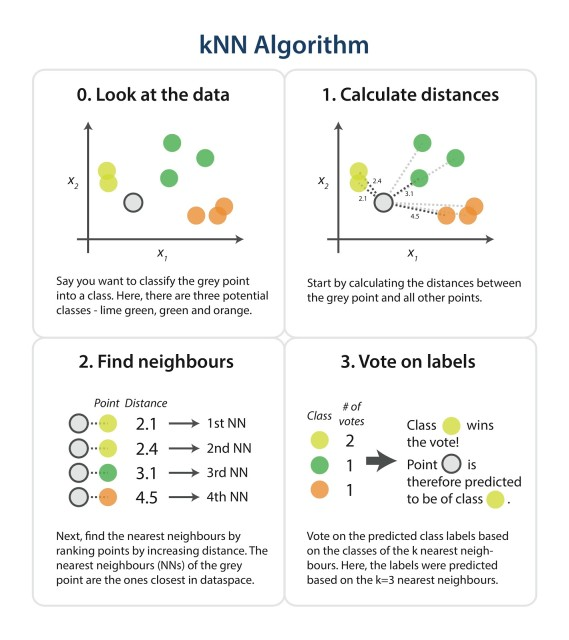

In [104]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,1,1.0
1,1,1,1,1,0,1,2.0
2,1,3,1,0,0,1,1.0
3,1,1,1,1,0,1,1.0
4,0,3,0,0,0,1,1.0


In [105]:
#Function to compute Euclidean Distance between to points p1 and p2
def eucledian_dist(p1, p2):
  dist = np.sqrt(np.sum((p1 - p2) ** 2))
  return dist
 
#Function to calculate K Nearest Neighbours
def predict(x_train, y, x_input, k):
  predicted_labels = []
     
  #Loop through the Datapoints to be classified
  for item in x_input: 
         
    #Array to store distances
    point_dist = []
         
    #Loop through each training Datapoint
    for j in range(len(x_train)): 
      distances = eucledian_dist(np.array(x_train[j, :]), item) 
      #Calculating the distance
      point_dist.append(distances) 
    point_dist = np.array(point_dist) 
        
    # Sort the array preserving index and select first k elements
    dist = np.argsort(point_dist)[:k] 
         
    # Get the labels of K points 
    labels = y[dist]
         
    #Calculate the most occuring label (majority voting) 
    lab = mode(labels) 
    lab = lab.mode[0]
    predicted_labels.append(lab)
 
  return predicted_labels

In [106]:
X_train = np.array(train_df.loc[:, train_df.columns != 'Survived'].values)
Y_train = np.array(train_df['Survived'].values)



---
# Evaluating our KNN Classifier


---




In [107]:
from sklearn.metrics import accuracy_score
 
#Applying our predict function (k = 7)
y_pred = predict(X_train, Y_train, X_test , 7)
 
print(f"KNN Classifier Accuracy : {accuracy_score(Y_test, y_pred) * 100:.2f} %")

KNN Classifier Accuracy : 86.84 %
